In [2]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

In [3]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)

In [4]:
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


### Spy NAN values
White is NAN, black is finite value

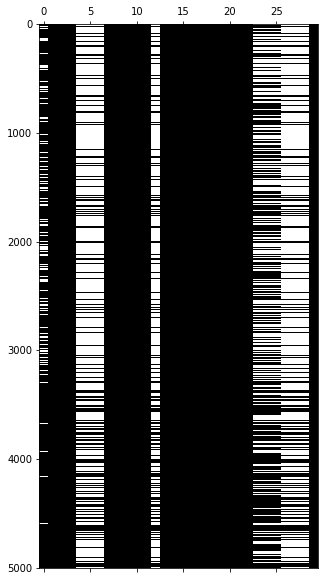

In [5]:
NAN_values_overview_matrix(tx, y)

divide into 4 depending on the feature 22

In [26]:
tx0, y0, tx1, y1, tx2, y2, tx3, y3 = separate_PRI_jet_num(tx, y)
print("tx0 has shape {tx0} and y0 has shape {y0}".format(tx0=tx0.shape, y0=y0.shape))
print("tx1 has shape {tx1} and y1 has shape {y1}".format(tx1=tx1.shape, y1=y1.shape))
print("tx2 has shape {tx2} and y2 has shape {y2}".format(tx2=tx2.shape, y2=y2.shape))
print("tx3 has shape {tx3} and y3 has shape {y3}".format(tx3=tx3.shape, y3=y3.shape))

tx0 has shape (1985, 30) and y0 has shape (1985,)
tx1 has shape (1540, 30) and y1 has shape (1540,)
tx2 has shape (1043, 30) and y2 has shape (1043,)
tx3 has shape (432, 30) and y3 has shape (432,)


### Feature Normalization

In [6]:
## TODO : remove NAN before standardization, or at least not consider them in np.mean() and np.std.
tx_nan = transform_to_nan(tx, -900)
tx_nan_norm, mean_x, std_x = standardize_with_nan(tx_nan)



### Feature Distribution

In [5]:
tx[:,22]

array([2., 1., 1., ..., 1., 1., 1.])

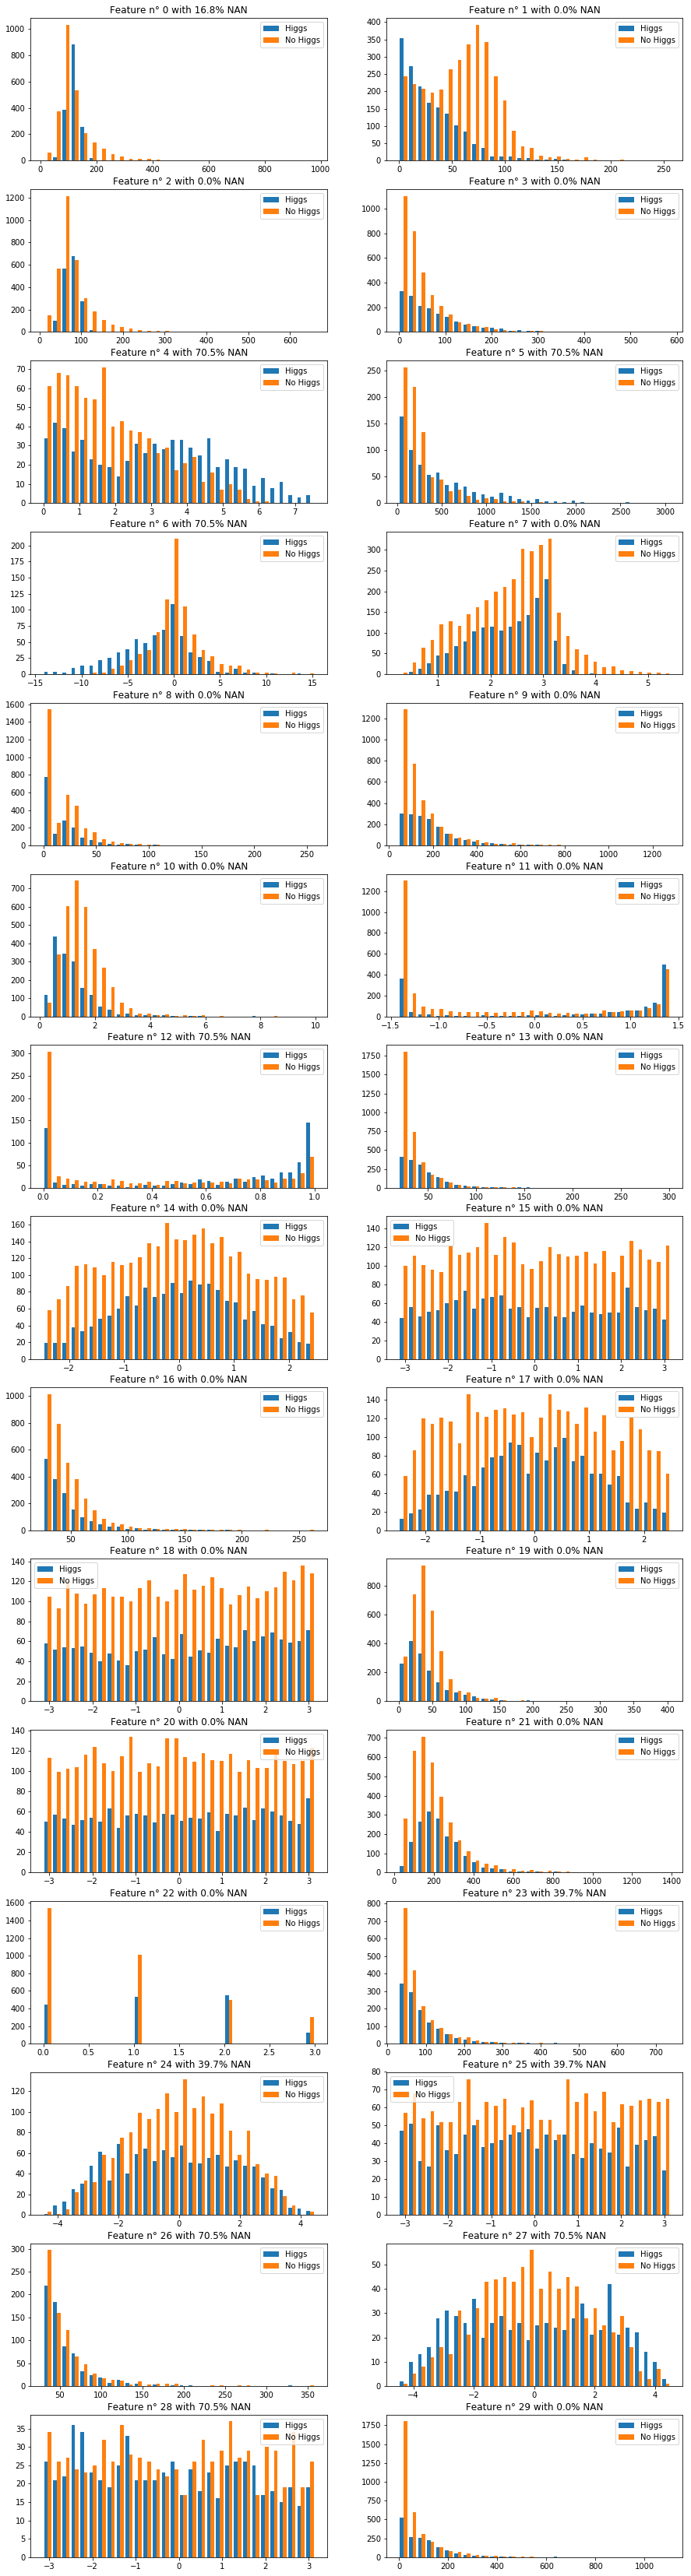

In [7]:
display_feature_distribution(y, tx_nan, 30)

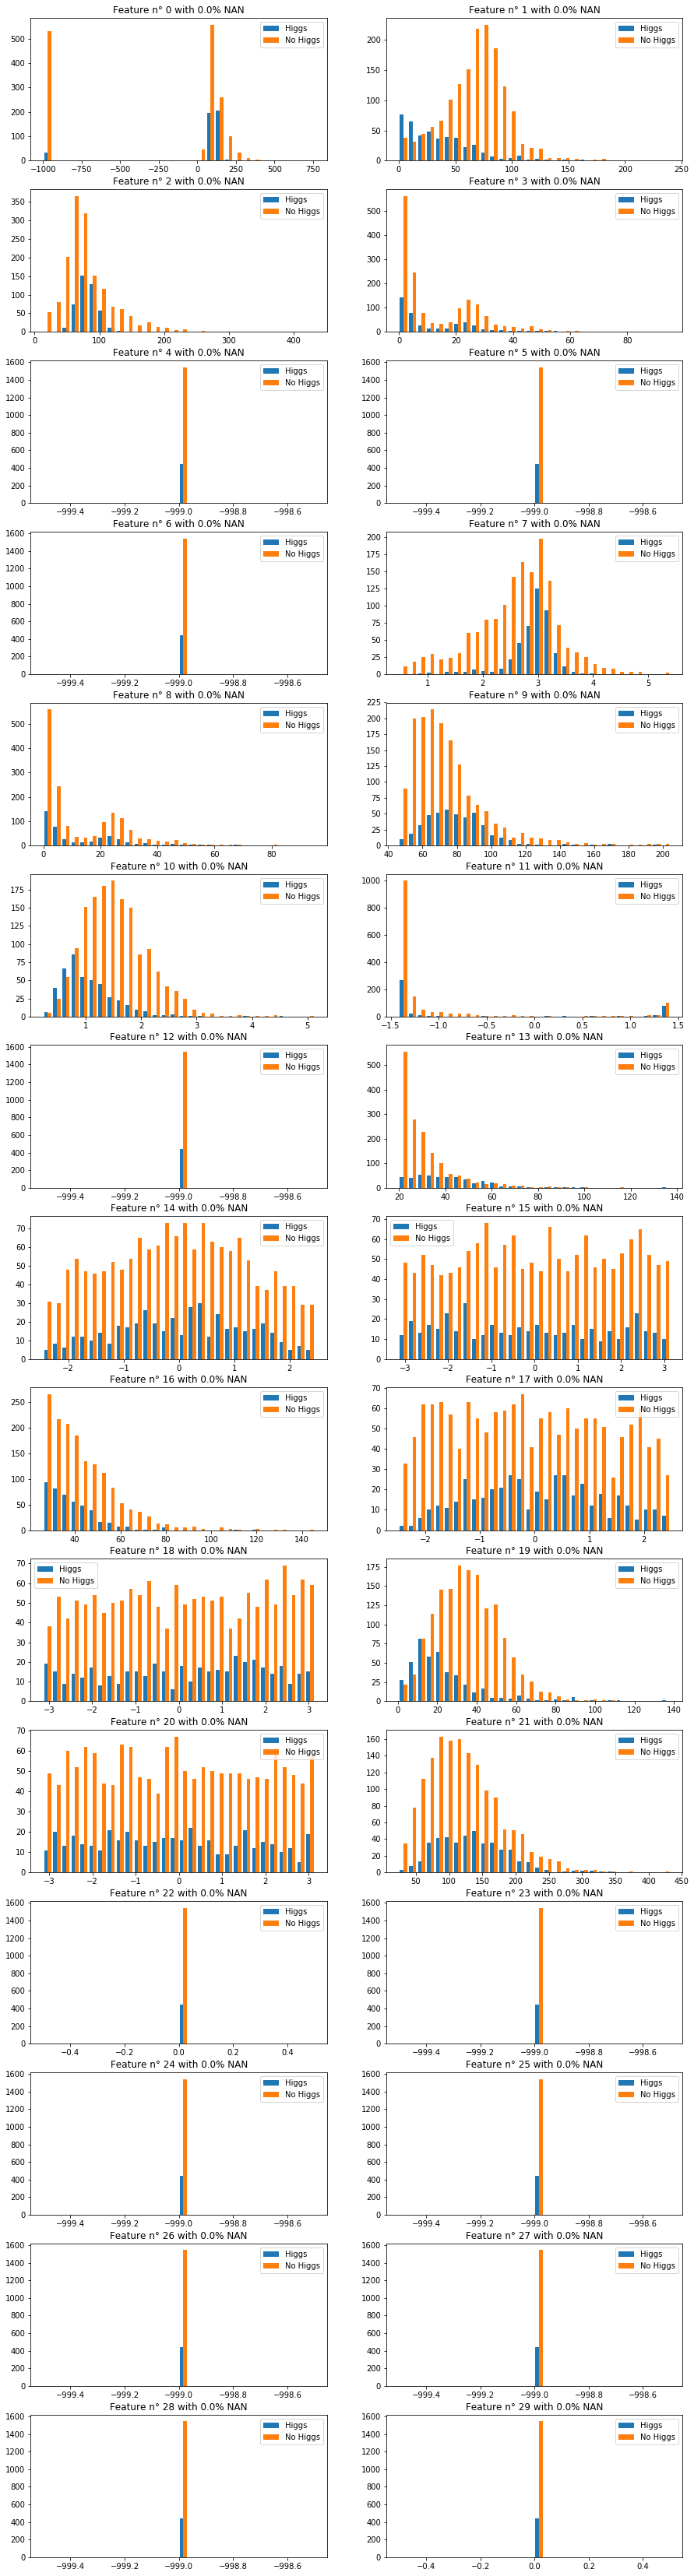

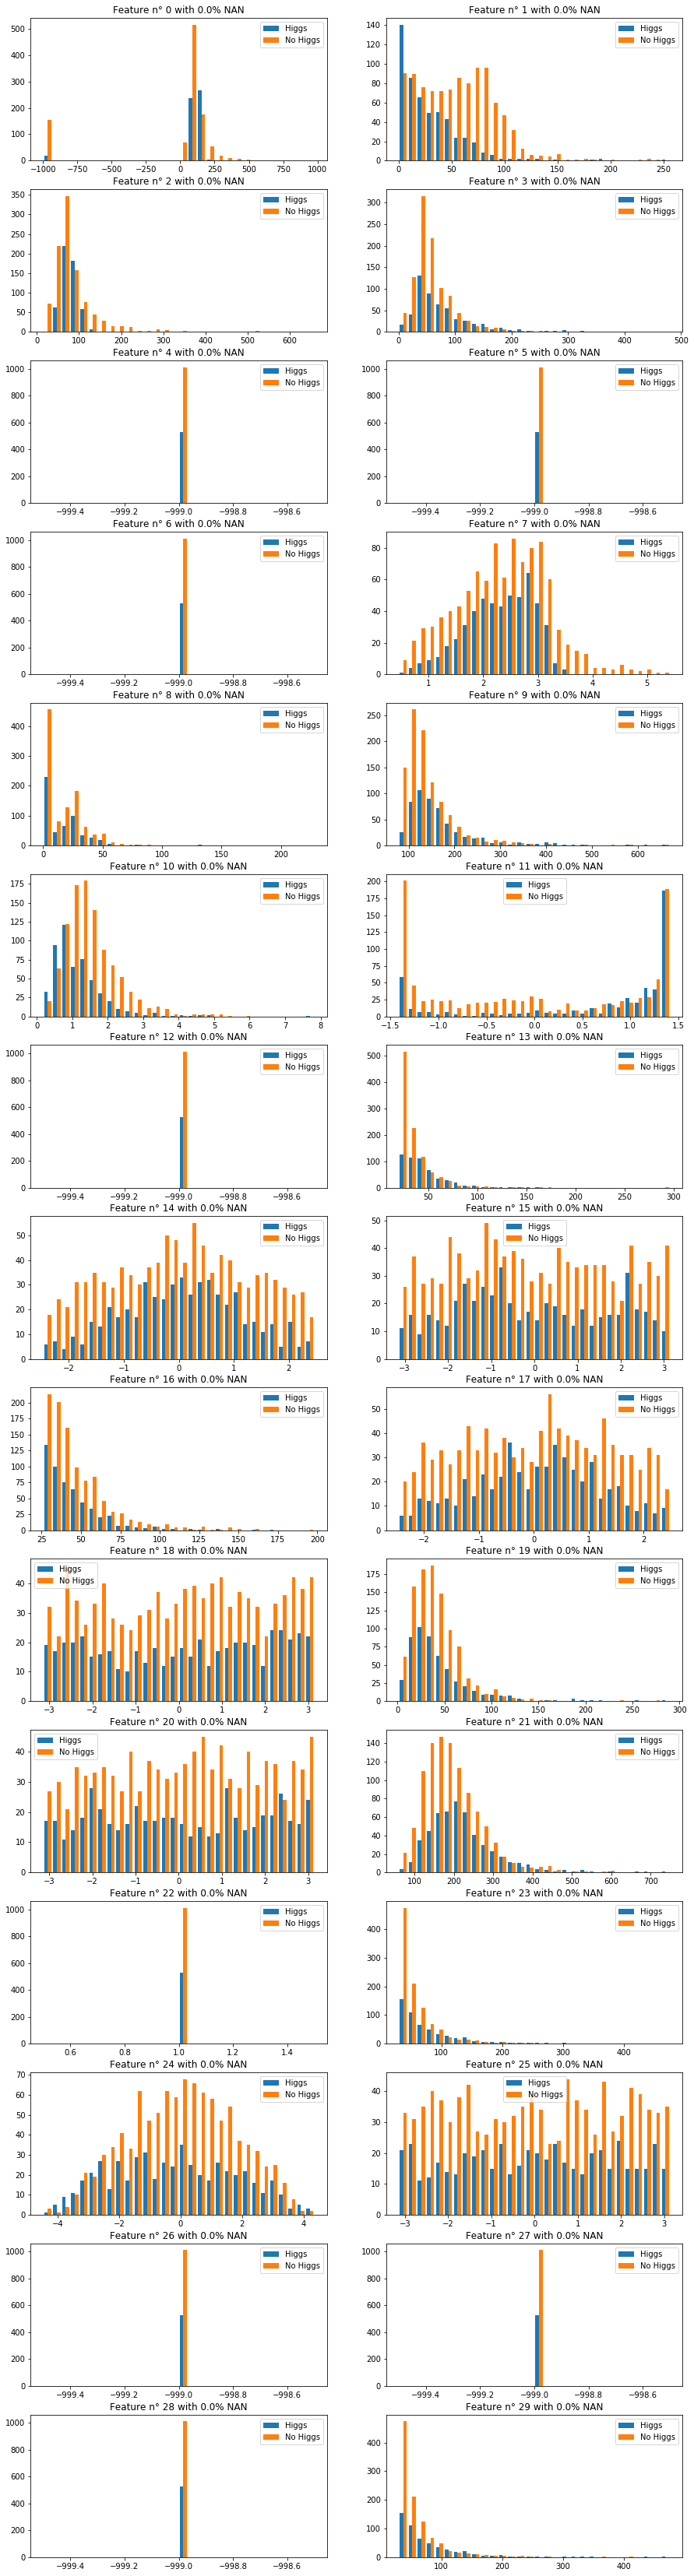

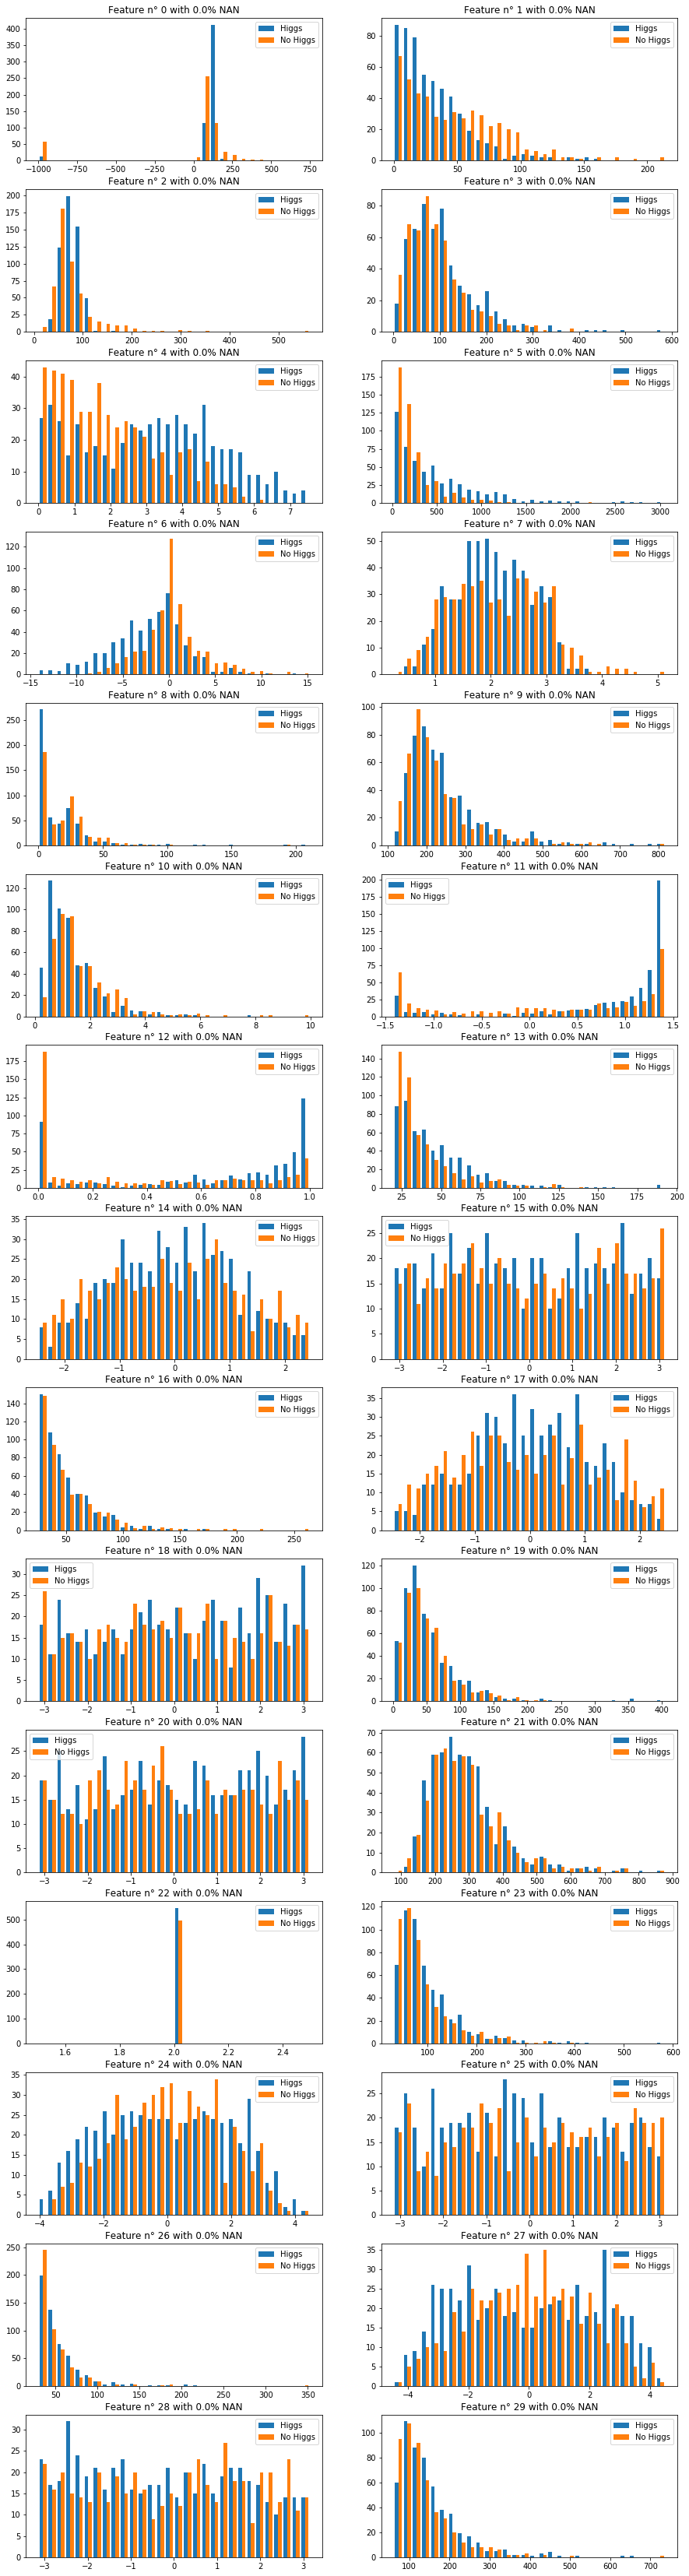

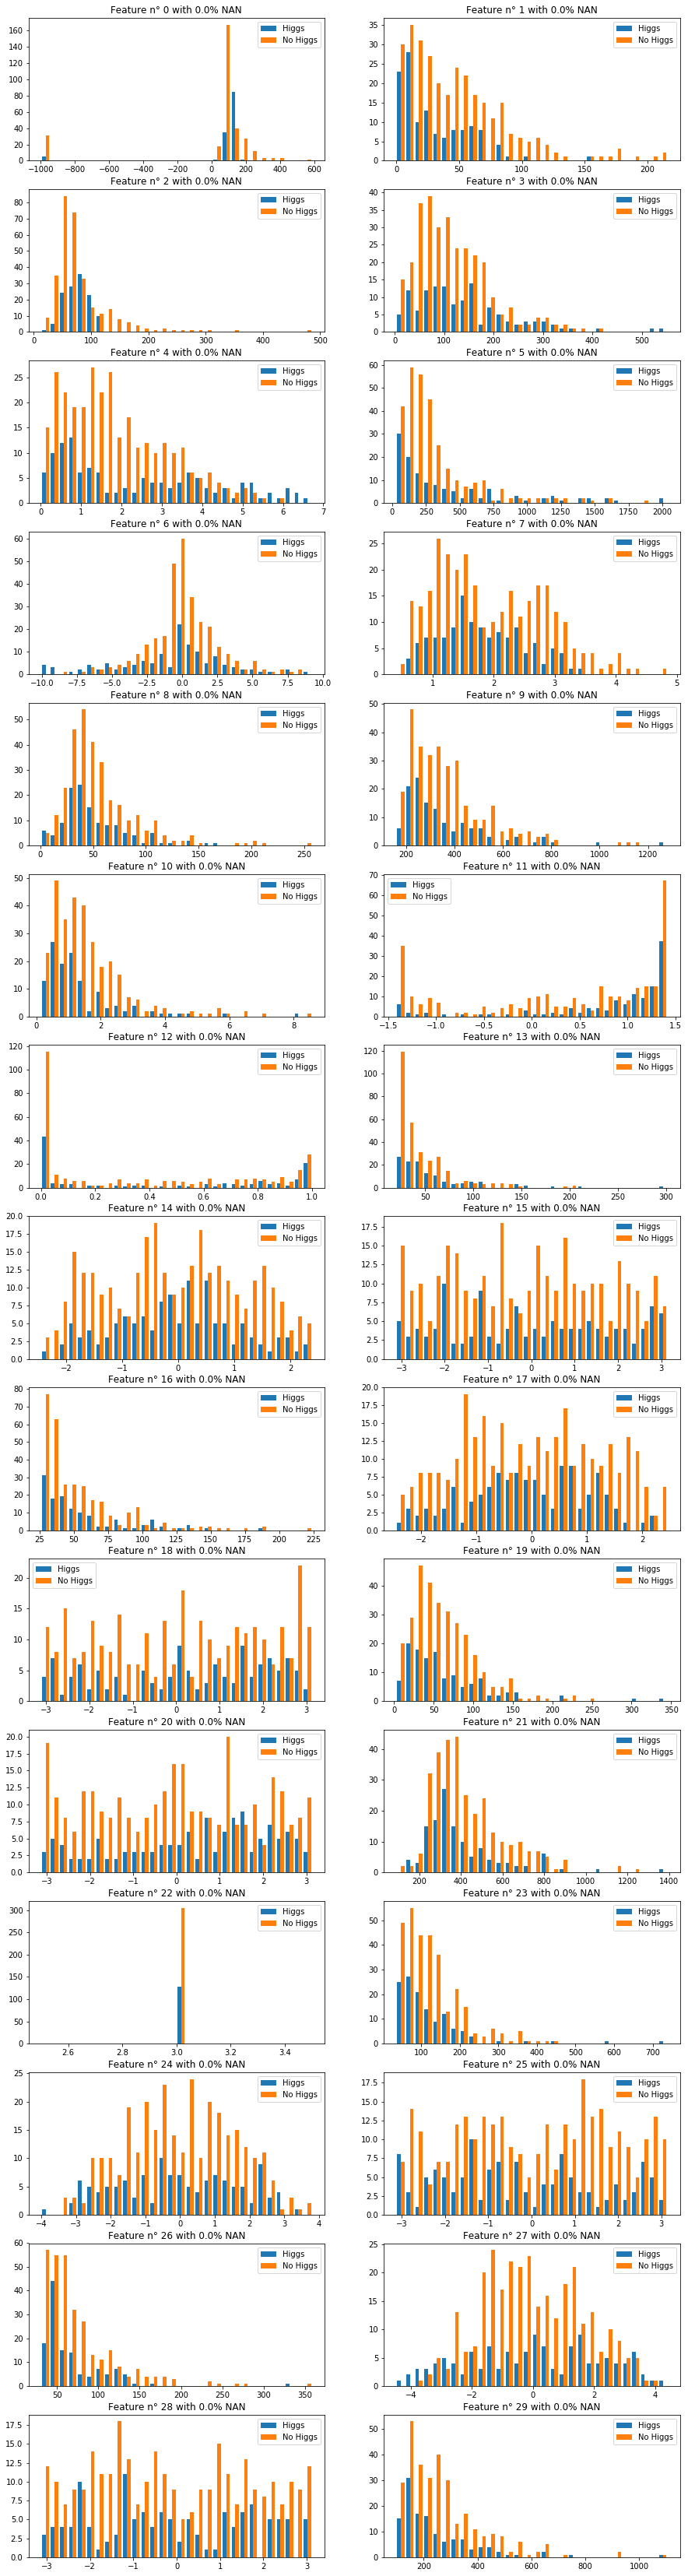

In [29]:
#feature distribution for the different groups tx0, tx1, tx2 and tx3
display_feature_distribution(y0, tx0, 30)
display_feature_distribution(y1, tx1, 30)
display_feature_distribution(y2, tx2, 30)
display_feature_distribution(y3, tx3, 30)

#### Missing Data

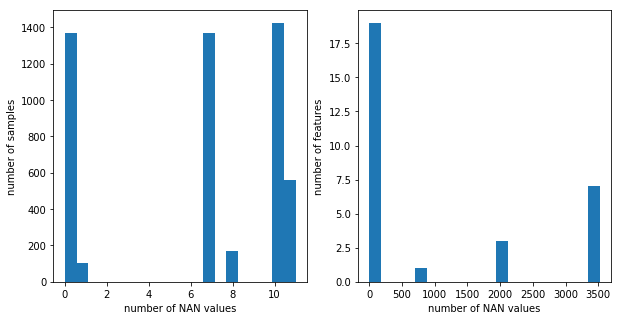

In [30]:
NAN_values_overview(tx_nan_norm, 20)

### Modify Feature Distribution 

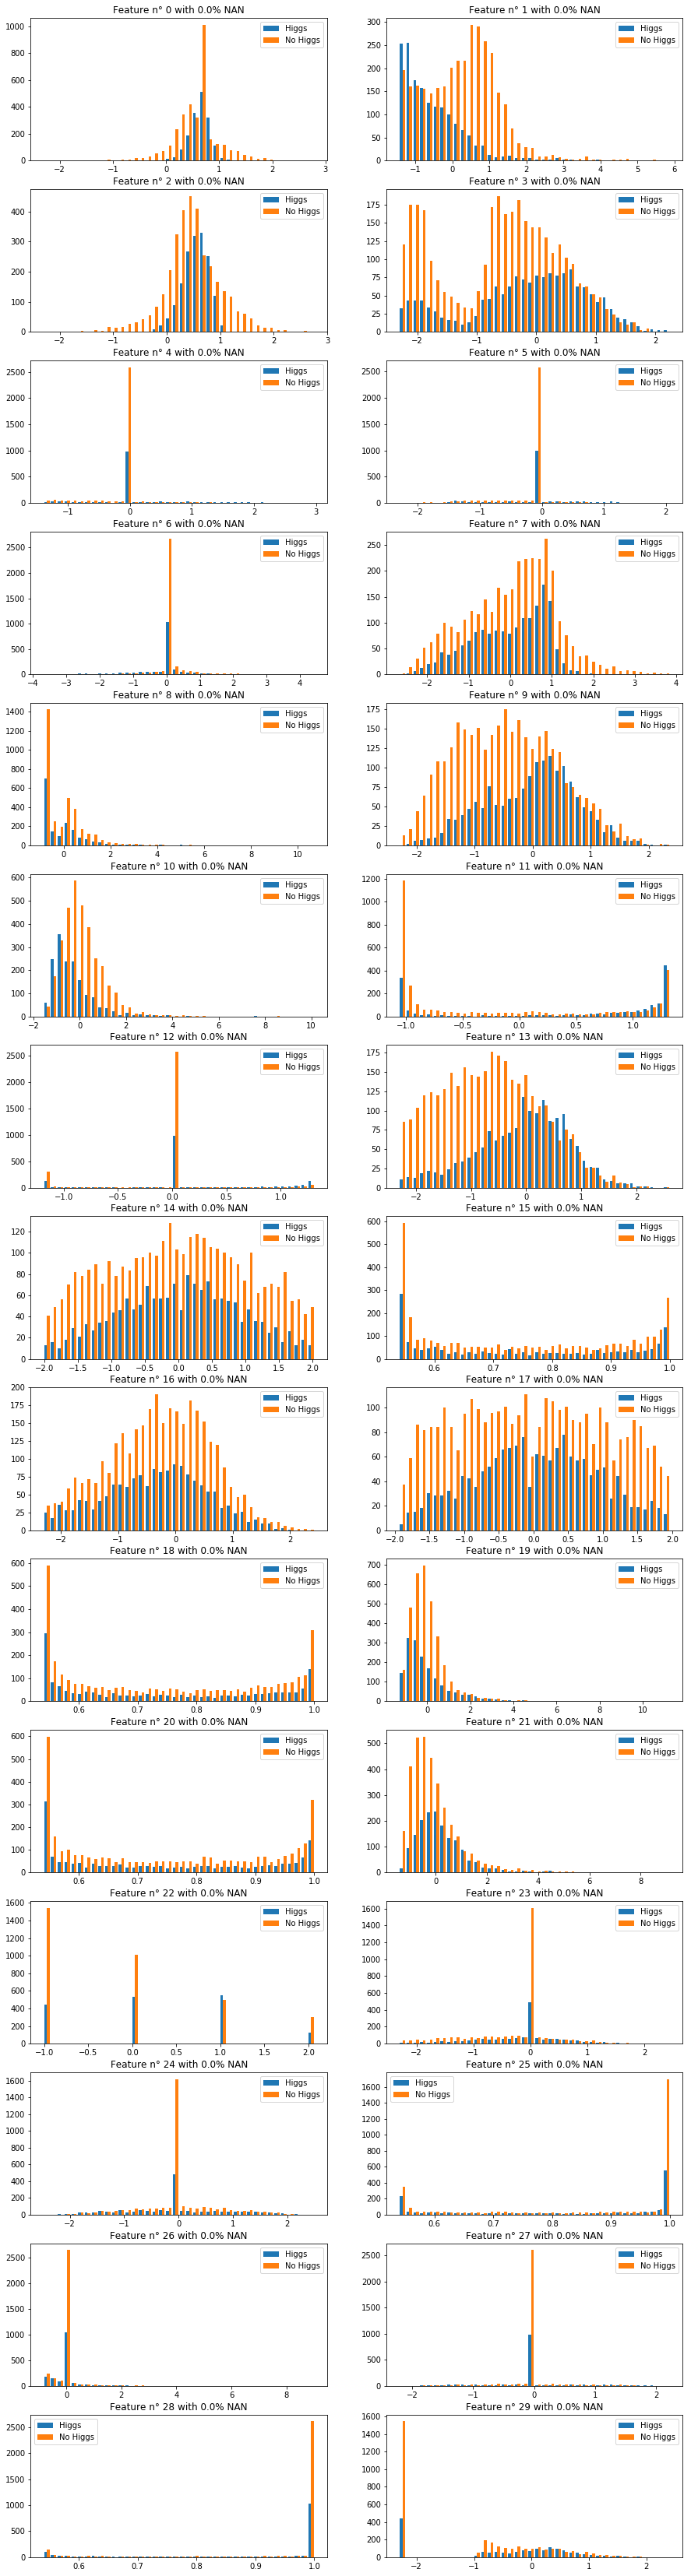

In [31]:
tx_0_norm = transform_nan_to_zero(tx_nan_norm)
features_log = [0, 2, 3, 5, 9, 13, 16, 23, 29]
features_sin_cos = [15, 18, 20, 25, 28]

tx_0_norm_adujsted_log = transform_feature_log(tx_0_norm, features_log)
tx_0_norm_adujsted_log_sin = transform_feature_sin(tx_0_norm_adujsted_log, features_sin_cos)
tx_0_norm_adujsted_log_sin_cos = transform_feature_cos(tx_0_norm_adujsted_log_sin, features_sin_cos)

txx = tx_0_norm_adujsted_log_sin_cos
display_feature_distribution(y, txx, 40)

### Clean Dataset

With a first glance at the data set we see that some features are almost entirely filled with missing data. Lets say the we remove features and samples with more thant 30% of missing values

In [32]:
tx_nan_norm.shape
txx.shape

(5000, 30)

In [33]:
#tx_cleaned = tx_nan_norm[:, ~np.isnan(tx_nan_norm).any(axis=0)]
#tx_cleaned.shape



### Train model 

#### Create Cross-validation datasets

In [34]:
test_indices, train_indices = create_cross_validation_datasets(tx.shape[0],4)

#### Least Square Gradient Descent
Linear regression using gradient descent

In [35]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à n dim à 0
initial_w_gd = np.zeros(c)
max_iters = 1000
gamma = 0.25
gd_losses, gd_ws = gradient_descent(y, txx, initial_w_gd, max_iters, gamma)

Gradient Descent(0/999): loss=1.0, w0=-0.04179268796602373, w1=-0.08378602898962993
Gradient Descent(1/999): loss=0.7349284267680133, w0=0.002957092133560116, w1=-0.10378452548981558
Gradient Descent(2/999): loss=0.8791029355430928, w0=-0.024619689919448136, w1=-0.14828814528369758
Gradient Descent(3/999): loss=0.704026892991162, w0=0.014251274124560238, w1=-0.14861593118726765
Gradient Descent(4/999): loss=0.8301969442022608, w0=-0.011463581557341986, w1=-0.17813992595308614
Gradient Descent(5/999): loss=0.6879028639567368, w0=0.021382210498828526, w1=-0.17303893207548804
Gradient Descent(6/999): loss=0.8012185899852948, w0=-0.002252227241899253, w1=-0.1958559941506082
Gradient Descent(7/999): loss=0.677319257724824, w0=0.02583738283831872, w1=-0.1894706597435059
Gradient Descent(8/999): loss=0.7806124949234902, w0=0.0044904079696955375, w1=-0.20831200639272582
Gradient Descent(9/999): loss=0.6705808033077243, w0=0.028762322706528797, w1=-0.2018880723468572
Gradient Descent(10/999): l

Gradient Descent(317/999): loss=0.6705449528098864, w0=0.10011151740805795, w1=-0.2637024835065495
Gradient Descent(318/999): loss=0.6705417079536056, w0=0.10018126314575113, w1=-0.2636780297465268
Gradient Descent(319/999): loss=0.6705384718607924, w0=0.10025060385608629, w1=-0.26365367029585784
Gradient Descent(320/999): loss=0.6705352453898004, w0=0.10031954182961421, w1=-0.26362940490220216
Gradient Descent(321/999): loss=0.6705320276797273, w0=0.1003880796930349, w1=-0.2636052331250181
Gradient Descent(322/999): loss=0.6705288194819498, w0=0.10045621972497994, w1=-0.2635811547010427
Gradient Descent(323/999): loss=0.6705256200367937, w0=0.10052396449776878, w1=-0.26355716920170663
Gradient Descent(324/999): loss=0.6705224591199292, w0=0.10059131627605823, w1=-0.26353327635435925
Gradient Descent(325/999): loss=0.6705193091040607, w0=0.10065827758090244, w1=-0.26350947574116884
Gradient Descent(326/999): loss=0.6705161682953285, w0=0.1007248506612347, w1=-0.26348576708145177
Gradie

Gradient Descent(599/999): loss=0.670006860339213, w0=0.10988491774638083, w1=-0.2594822313504012
Gradient Descent(600/999): loss=0.6700058793363278, w0=0.10989893304486457, w1=-0.25947386329021394
Gradient Descent(601/999): loss=0.6700049009755394, w0=0.10991287014951236, w1=-0.2594655261625711
Gradient Descent(602/999): loss=0.6700039252514626, w0=0.10992672950519888, w1=-0.25945721984741454
Gradient Descent(603/999): loss=0.6700029521587114, w0=0.10994051155422858, w1=-0.25944894422517917
Gradient Descent(604/999): loss=0.6700019816918997, w0=0.10995421673635078, w1=-0.259440699176791
Gradient Descent(605/999): loss=0.6700010138456414, w0=0.10996784548877478, w1=-0.25943248458366513
Gradient Descent(606/999): loss=0.6700000486145498, w0=0.10998139824618475, w1=-0.25942430032770336
Gradient Descent(607/999): loss=0.6699990859932385, w0=0.10999487544075462, w1=-0.2594161462912923
Gradient Descent(608/999): loss=0.6699981259763214, w0=0.11000827750216287, w1=-0.25940802235730104
Gradie

Gradient Descent(951/999): loss=0.6698083025011858, w0=0.11206405495268369, w1=-0.2578185383512417
Gradient Descent(952/999): loss=0.6698080014151591, w0=0.11206610305682684, w1=-0.2578161818130357
Gradient Descent(953/999): loss=0.6698077012465338, w0=0.11206814033106513, w1=-0.25781383353804843
Gradient Descent(954/999): loss=0.6698074019927527, w0=0.11207016683494736, w1=-0.25781149349634236
Gradient Descent(955/999): loss=0.6698071036512638, w0=0.11207218262768744, w1=-0.2578091616580931
Gradient Descent(956/999): loss=0.669806806219521, w0=0.11207418776816629, w1=-0.2578068379935891
Gradient Descent(957/999): loss=0.6698065096949838, w0=0.11207618231493376, w1=-0.257804522473231
Gradient Descent(958/999): loss=0.6698062140751176, w0=0.11207816632621044, w1=-0.25780221506753126
Gradient Descent(959/999): loss=0.6698059193573931, w0=0.1120801398598897, w1=-0.2577999157471137
Gradient Descent(960/999): loss=0.6698056255392869, w0=0.11208210297353931, w1=-0.25779762448271315
Gradient 

#### Least Square Stochastic Gradient Descent
Linear regression using stochastic gradient descent

In [39]:
#l = nb lignes in x and c = nb columns in x
(l, c) = np.shape(txx)
#initialise le w initial à 30 dim à 0
initial_w_sgd = np.zeros(c)
max_iters_sgd = 100
gamma_sgd = 0.04
sgd_losses, sgd_ws = stochastic_gradient_descent(y, txx, initial_w_sgd,10,  max_iters_sgd, gamma_sgd)

SGD(0/99): loss=0.4181526061569083, w0=-0.022037417947067414, w1=-0.009571679585285752
SGD(1/99): loss=0.41733898935854014, w0=-0.029745126808434347, w1=-0.005665841602716777
SGD(2/99): loss=0.40418746228752317, w0=-0.03181952820089509, w1=-0.005564196226717914
SGD(3/99): loss=0.3943544597380096, w0=-0.02994595112570822, w1=-0.017293082466461843
SGD(4/99): loss=0.3988784825003258, w0=-0.02296182638803267, w1=-0.019228678215195333
SGD(5/99): loss=0.4030232619764443, w0=-0.023894077871460643, w1=-0.026474171189658755
SGD(6/99): loss=0.3918034783362262, w0=-0.024397847830043323, w1=-0.025823669302153438
SGD(7/99): loss=0.39430091724865146, w0=-0.017967242932703294, w1=-0.026876928750279815
SGD(8/99): loss=0.4012663450344174, w0=-0.015864908559209075, w1=-0.011716637678681297
SGD(9/99): loss=0.4014414694516887, w0=-0.009473618793849975, w1=-0.029666583939353723
SGD(10/99): loss=0.39269796237191995, w0=-0.024877177261182958, w1=-0.022566402162890874
SGD(11/99): loss=0.39117437938081073, w0=

#### Least Square
Least squares regression using normal equations

In [40]:
weight = least_squares(y, txx)
losses = compute_loss(y, txx, weight)
print("weights : {0}".format(weight))
print("losses : {0}".format(losses))

weights : [ 0.11051554 -0.2568357  -0.32113174 -0.07081299  0.49652604 -0.49102522
 -0.04901669  0.1770458   0.01579191  0.03954131  0.10391632  0.12438019
  0.13730787  0.36100783  0.00545586 -0.01328455  0.03348455  0.02539963
 -0.07338907  0.06837654 -0.03006469 -0.0847102  -0.21784139  0.04543065
 -0.03770506  0.0166237   0.06115731  0.00725961 -0.06214666  0.19787683
  0.01367538  0.11984668  0.03025817 -0.02170751  0.06292839 -0.00616231
 -0.01642778  0.00290473  0.05202917  0.00379839]
losses : 0.32201628761540085


#### Ridge Regression
Ridge regression using normal equations

In [41]:
#for different lambdas
lambdas = np.logspace(-100, 100, 200);
#ridge reggression for different lambda
losses = []
for index, lambda_ in enumerate(lambdas):
    weight = ridge_regression(y, txx, lambda_)
    losses.append(compute_loss(y, txx, weight))
print(losses)

[0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.32201628761540085, 0.3220162876

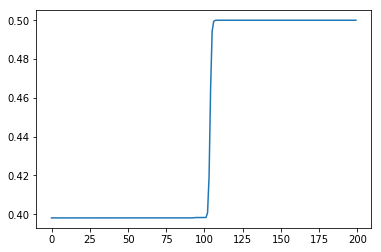

In [64]:
plt.plot(list(range(len(losses))), losses)
plt.show()

#### Logistic Regression
Logistic regression using gradient descent or SGD

#### Reg Logistic Regression
Regularized logistic regression using gradient descent
or SGD